[(0, 'Start'), (77, 'Harris Hall'), (642, 'Tobler Museum'), (809, 'Snow Church'), (1388, 'Lynch Station'), (1621, 'Harvey House'), (1740, 'Sauer Center'), (2020, 'Harris Hall'), (2138, 'Lynch Station'), (2220, 'Batty House')]
3
Distance from Start to Harris Hall is 202.89000000000004, shortcut is None
Efficiency is 0
Distance from Harris Hall to Tobler Museum is 1571.12, shortcut is 400.4999664
Efficiency is 0.25491367075716687
Distance from Tobler Museum to Snow Church is 330.75000000000006, shortcut is 213.5999821
Efficiency is 0.6458049345427058
Distance from Snow Church to Lynch Station is 1645.5100000000004, shortcut is 692.4199418
Efficiency is 0.4207935179974596
Distance from Lynch Station to Harvey House is 684.9100000000001, shortcut is 404.0599661
Efficiency is 0.5899460748127491
Distance from Harvey House to Sauer Center is 875.9499999999999, shortcut is 726.239939
Efficiency is 0.8290883486500372
Distance from Sauer Center to Harris Hall is 862.5599999999998, shortcut is 55

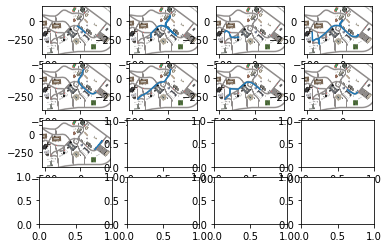

In [1]:
# import numpy scipy matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from math import sqrt
import csv

# create an empty list
data = []
# list all the files in the data folder
files = os.listdir('../data')

# loop through the files and import each file as csv file with delimiter ';'
for file in files:
    data.append(np.genfromtxt('../data/' + file, delimiter=';'))

# load the "shortcuts_fixed.csv" file as csv file with delimiter ',' with csvreader, skip the first row.
shortcuts = {}
with open('../shortcuts_fixed.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        if shortcuts.get(row[0]) is None:
            shortcuts[row[0]] = dict()
        shortcuts[row[0]][row[1]] = float(row[2])

# print(shortcuts)


def get_shortcut(a, b):
    if a in shortcuts and b in shortcuts[a]:
        return shortcuts[a][b]
    elif b in shortcuts and a in shortcuts[b]:
        return shortcuts[b][a]
    else:
        return None


i = 0

# store the first column of the first file in a variable X
X = data[i][:, 0]
# store the third column of the first file in a variable Z
Z = data[i][:, 2]
# store the fourth column of the first file in a variable Delta
Heading = data[i][:, 3]

landmarks = {'Batty House': (301.57, -88.5),
             'Lynch Station': (207.35, -204.61),
             'Harris Hall': (69.79, -163.72),
             'Harvey House': (44.48, 118.56),
             'Golledge Hall': (-320.05, -157.11),
             'Snow Church': (-421.37, -156.7),
             'Sauer Center': (-416.92, -295.53),
             'Tobler Museum': (-236.08, -227.27)}

# combine the X, Z and Delta columns into a matrix with 3 columns
XZD = np.column_stack((X, Z, Heading))

# add a column of ones to the back of matrix as the 4th column
XZD = np.column_stack((XZD, np.ones(len(X))))

# for consecutive rows, calculate the difference between the 3rd column of the rows
# and store the result in a new array
heading_changes = np.diff(XZD[:, 2])
# print the first 20 elements of the heading_changes array
# print(heading_changes[:20])

# loop each entry in the heading_changes array with index i
deleted_offset = 0
for i in range(len(heading_changes)):
    # if the entry at i is zero, delete the i+1 row in the XZD matrix and add 1 to the 4th column of the i row
    if heading_changes[i] == 0:
        j = i - deleted_offset
        XZD = np.delete(XZD, j + 1, 0)
        XZD[j, 3] += 1

        deleted_offset += 1

visited_landmark = ()
indices = [(0, "Start")]

for i in range(len(XZD)):
    x = XZD[i][0]
    z = XZD[i][1]
    n = XZD[i][3]
    for name, (x_landmark, z_landmark) in landmarks.items():
        if n < 10:
            continue
        distance = np.sqrt((x - x_landmark) ** 2 + (z - z_landmark) ** 2)

        if visited_landmark and visited_landmark[0] == name:
            if distance < visited_landmark[1]:
                visited_landmark = (name, distance)
                # remove last item in indices
                indices.pop()
                indices.append((i, name))
        else:
            if distance < 10:
                visited_landmark = (name, distance)
                indices.append((i, name))
            continue

print(indices)

# initialize a figure and axes


sqrt_fig_number = int(sqrt(len(indices) - 1))
print(sqrt_fig_number)
fig, ax = plt.subplots(sqrt_fig_number + 1, sqrt_fig_number + 1)
# fig, ax = plt.subplots()

# load the image "images/silcton_cropped.jpg"
img = plt.imread('../images/silcton_cropped.jpg')
# rotate the image by 180 degrees
img = np.rot90(img, 2)


# img = np.flipud(img)
# ax.imshow(img, extent=[-540, 410, -455, 205])


def one_to_two(n, row_length):
    return n // row_length, n % row_length


path_distances = []
for i in range(len(indices) - 1):
    start = indices[i][0]
    end = indices[i + 1][0]

    # denote the matrix XZD from start to end as XZD_sub with only the first 2 columns
    XZD_sub = XZD[start:end, :2]
    # calculate the sum of absolute differences between consecutive rows in XZD_sub
    # and append the result to path_distances
    path_distances.append(np.sum(np.abs(np.diff(XZD_sub, axis=0))))

    pos = one_to_two(i, sqrt_fig_number + 1)
    ax[pos].imshow(img, extent=[-540, 410, -455, 205])
    ax[pos].plot(XZD[start:end, 0], XZD[start:end, 1], label=indices[i + 1][1])

    a = indices[i][1]
    b = indices[i + 1][1]
    distance = path_distances[i]
    shortcut = get_shortcut(a, b)
    efficiency = (shortcut) / distance if distance and shortcut else 0

    print(f"Distance from {a} to {b} is {distance}, shortcut is {shortcut}")
    print(f"Efficiency is {efficiency}")

# i = 9
# start = indices[i][0]
# end = indices[i + 1][0]

# denote the matrix XZD from start to end as XZD_sub with only the first 2 columns
# XZD_sub = XZD[start:end, :2]
# calculate the sum of absolute differences between consecutive rows in XZD_sub and append the result to path_distances
# path_distances.append(np.sum(np.abs(np.diff(XZD_sub, axis=0))))

# print(one_to_two(i, sqrt_fig_number + 1))
# pos = one_to_two(i, sqrt_fig_number + 1)
# ax.plot(XZD[start:end, 0], XZD[start:end, 1], label=indices[i + 1][1])
#
# print(f"Distance from {indices[i][1]} to {indices[i + 1][1]}: {path_distances[0]}")
# show the plot
plt.show()